<a href="https://colab.research.google.com/github/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-28 03:46:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   131MB/s    in 0.8s    

2025-01-28 03:46:25 (131 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib
import numpy as np


data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  #print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (512, 512, 3)


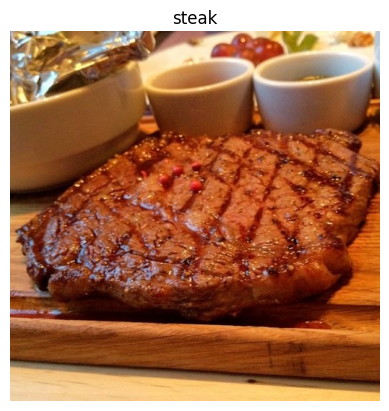

In [10]:
img = view_random_image("pizza_steak/train/", "steak")

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")

  ])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history_1 = model_1.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 323ms/step - accuracy: 0.6394 - loss: 0.6876 - val_accuracy: 0.8280 - val_loss: 0.4105
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.7989 - loss: 0.4729 - val_accuracy: 0.8520 - val_loss: 0.3707
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8113 - loss: 0.4415 - val_accuracy: 0.8640 - val_loss: 0.3639


In [14]:
result_1 = model_1.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8682 - loss: 0.3436


In [15]:
 model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")

  ])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602,141 (2.30 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history_2 = model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.5222 - loss: 1.8569 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.4866 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


In [17]:
result_2 = model_2.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.5179 - loss: 0.6930


In [18]:
 tf.random.set_seed(42)

 model_3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (224,224,3)),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
 ])

 model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

 model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,073,201 (57.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history_3 = model_3.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.5882 - loss: 9.5962 - val_accuracy: 0.6340 - val_loss: 1.4891
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.6817 - loss: 0.9860 - val_accuracy: 0.7760 - val_loss: 0.4914
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.7570 - loss: 0.5485 - val_accuracy: 0.7540 - val_loss: 0.4765


In [20]:
result_3 = model_3.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.7650 - loss: 0.4712


Image shape: (512, 512, 3)
Image shape: (512, 289, 3)


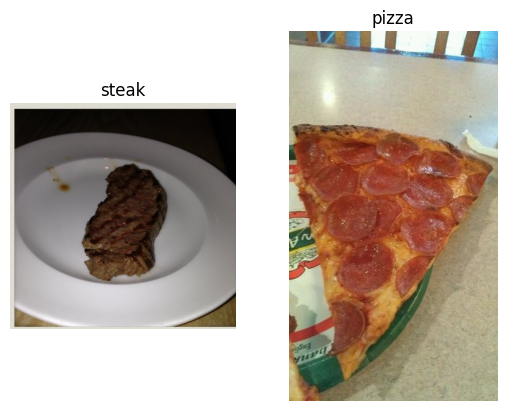

In [21]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
!nvidia-smi

Tue Jan 28 03:48:42 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0              26W /  70W |   2215MiB / 15360MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.


In [26]:
test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 500 images belonging to 2 classes.


In [27]:
images,labels = next(train_data)
len(images),len(labels)

(32, 32)

In [28]:
images[:2],images[0].shape

(array([[[[0.97647065, 0.9450981 , 0.6627451 ],
          [0.97647065, 0.94117653, 0.67058825],
          [0.97647065, 0.94117653, 0.6862745 ],
          ...,
          [0.97647065, 0.90196085, 0.6039216 ],
          [0.9843138 , 0.90196085, 0.5921569 ],
          [0.9843138 , 0.90196085, 0.58431375]],
 
         [[0.9803922 , 0.9450981 , 0.68235296],
          [0.9803922 , 0.9450981 , 0.6901961 ],
          [0.9803922 , 0.94117653, 0.69803923],
          ...,
          [0.97647065, 0.909804  , 0.6039216 ],
          [0.97647065, 0.9058824 , 0.58431375],
          [0.9803922 , 0.909804  , 0.5803922 ]],
 
         [[0.9843138 , 0.9450981 , 0.7019608 ],
          [0.9843138 , 0.9450981 , 0.7058824 ],
          [0.9843138 , 0.9450981 , 0.7137255 ],
          ...,
          [0.9725491 , 0.909804  , 0.6039216 ],
          [0.9725491 , 0.91372555, 0.5882353 ],
          [0.97647065, 0.909804  , 0.5882353 ]],
 
         ...,
 
         [[0.13333334, 0.04313726, 0.01960784],
          [0.12549

In [29]:
images[7].shape


(224, 224, 3)

In [30]:
labels

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

In [32]:
model_4 = Sequential()
model_4.add(Conv2D(filters=10,
                   kernel_size=(3,3),
                   strides=1,
                   padding='valid',
                   activation='relu',
                   input_shape = (224,224,3)

                   ))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1,activation = 'sigmoid'))


In [33]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )


In [34]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
len(train_data),len(test_data)

(47, 16)

In [36]:
#!pip install tensorboard

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

history_4 = model_4.fit(train_data,
            epochs = 5,
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [tensorboard_callback])

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.5564 - loss: 1.7275 - val_accuracy: 0.7880 - val_loss: 0.5474
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8232 - loss: 0.4432
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.8953 - loss: 0.2807 - val_accuracy: 0.8400 - val_loss: 0.3641
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9522 - loss: 0.1701
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9904 - loss: 0.0771 - val_accuracy: 0.8420 - val_loss: 0.4215


In [38]:
result_4 = model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8484 - loss: 0.3743


In [39]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8266 - loss: 0.4417


[0.42146918177604675, 0.8420000076293945]

In [40]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(min(len(loss), len(val_loss)))


  plt.plot(epochs,loss[:len(epochs)],label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy[:len(epochs)],label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

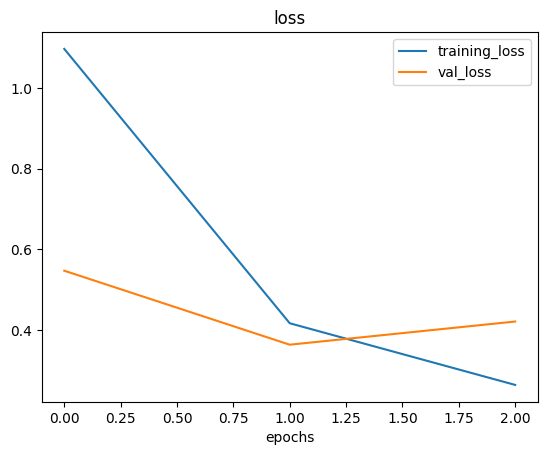

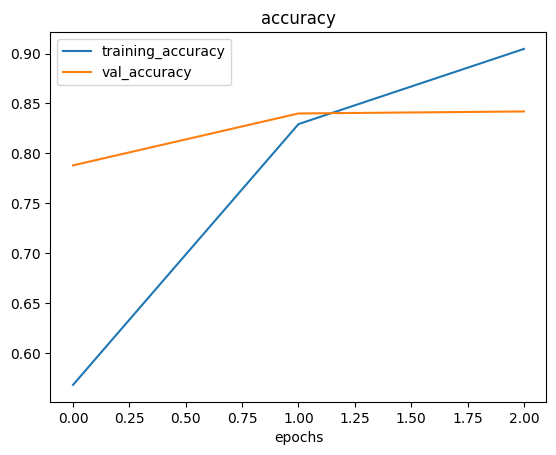

In [41]:
plot_loss_curves(history_4)

In [42]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [43]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"]
                )


In [44]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,861 (34.61 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.5748 - loss: 0.6619 - val_accuracy: 0.7720 - val_loss: 0.4621
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8025 - loss: 0.4509
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.8025 - loss: 0.4245 - val_accuracy: 0.8680 - val_loss: 0.3305
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8522 - loss: 0.3578
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.8438 - loss: 0.3743 - val_accuracy: 0.8680 - val_loss: 0.3335


In [46]:
result_5 = model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.8642 - loss: 0.3317


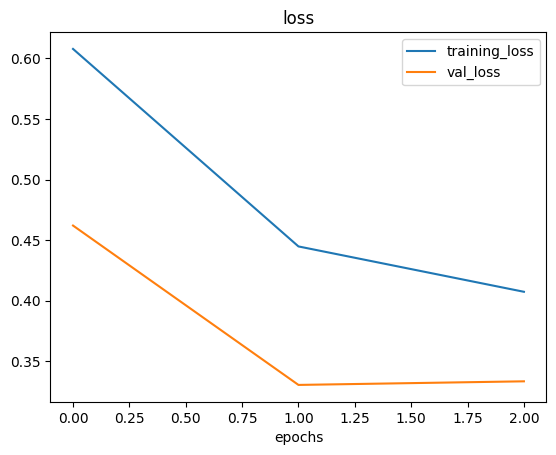

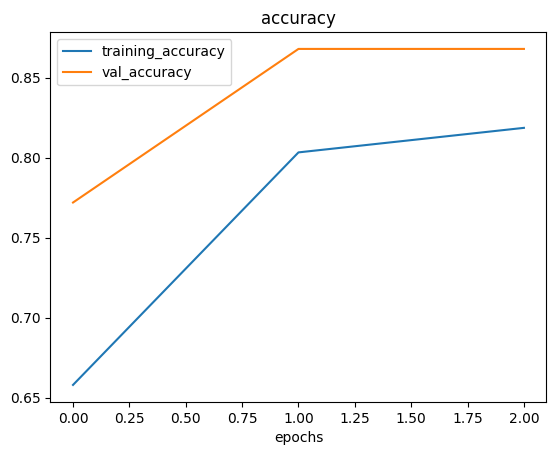

In [47]:
plot_loss_curves(history_5)

In [48]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range  =0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)



In [49]:
print("Augmented data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode = "binary",
                                                                   batch_size = 32,
                                                                   shuffle = False)

print("Non Augmented data")

IMG_SIZE =(224,224)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode ='binary',
                                               shuffle = False)


print("Unchanged Data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode ='binary',
                                             shuffle = False)




Augmented data
Found 1500 images belonging to 2 classes.
Non Augmented data
Found 1500 images belonging to 2 classes.
Unchanged Data
Found 500 images belonging to 2 classes.


In [50]:
images,labels  = next(train_data)
augmented_images,augmented_labels = next(train_data_augmented)

shwing image number: 7


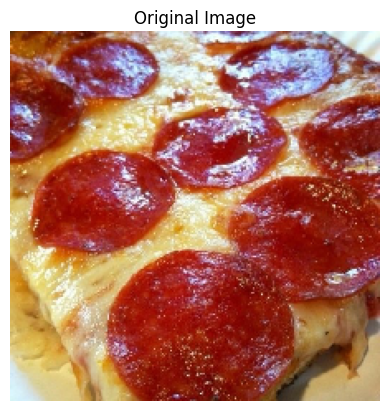

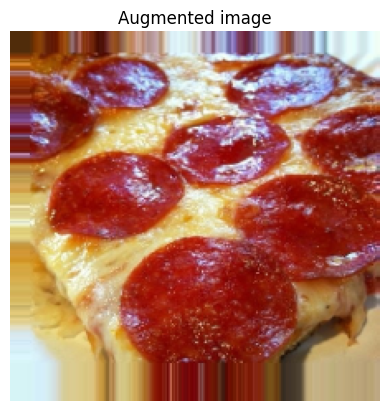

In [51]:

random_number = random.randint(0,32)
print(f'shwing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

In [52]:
model_6 = Sequential()
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10,3,activation = 'relu'))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(1,activation = 'sigmoid'))

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
history_6 = model_6.fit(train_data_augmented,
                       epochs = 5,
                       validation_data = test_data,
                       validation_steps = int(0.25*len(test_data)))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 417ms/step - accuracy: 0.3910 - loss: 0.7092 - val_accuracy: 1.0000 - val_loss: 0.6521
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - accuracy: 0.4295 - loss: 0.6979 - val_accuracy: 0.7812 - val_loss: 0.6864
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 381ms/step - accuracy: 0.5658 - loss: 0.6917 - val_accuracy: 0.8828 - val_loss: 0.6584
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 404ms/step - accuracy: 0.6219 - loss: 0.6777 - val_accuracy: 0.7500 - val_loss: 0.6420
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 392ms/step - accuracy: 0.6173 - loss: 0.6768


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [54]:
result_6 = model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.6102 - loss: 0.6473


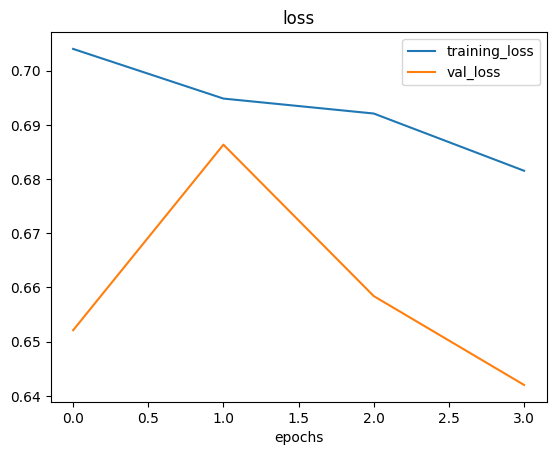

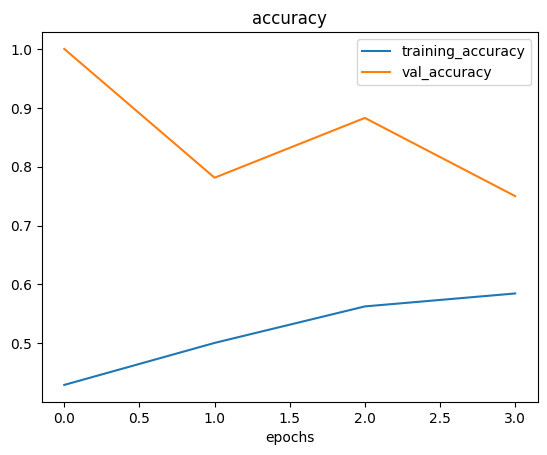

In [55]:
plot_loss_curves(history_6)


In [56]:
#shuffle the augmented data


train_data_augmented_shuffle =  train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [57]:
model_7 = Sequential()
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(10,3,activation = 'relu'))
model_7.add(MaxPool2D())
model_7.add(Flatten())
model_7.add(Dense(1,activation = 'sigmoid'))

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history_7 = model_7.fit(train_data_augmented_shuffle,
                       epochs = 5,
                       validation_data = test_data,
                       validation_steps = int(0.25*len(test_data)))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 395ms/step - accuracy: 0.5576 - loss: 0.6760 - val_accuracy: 0.3672 - val_loss: 0.9344
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 392ms/step - accuracy: 0.6848 - loss: 0.5835 - val_accuracy: 0.7188 - val_loss: 0.5512
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 362ms/step - accuracy: 0.7639 - loss: 0.5092 - val_accuracy: 0.8203 - val_loss: 0.3568
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.7694 - loss: 0.4942 - val_accuracy: 0.9741 - val_loss: 0.1443
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7873 - loss: 0.4438  


In [59]:
result_7 = model_7.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8797 - loss: 0.2950


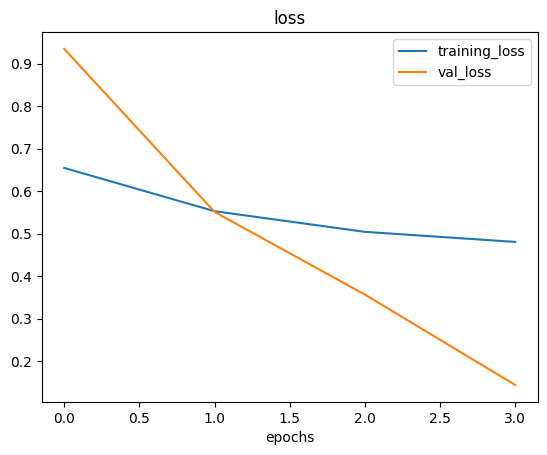

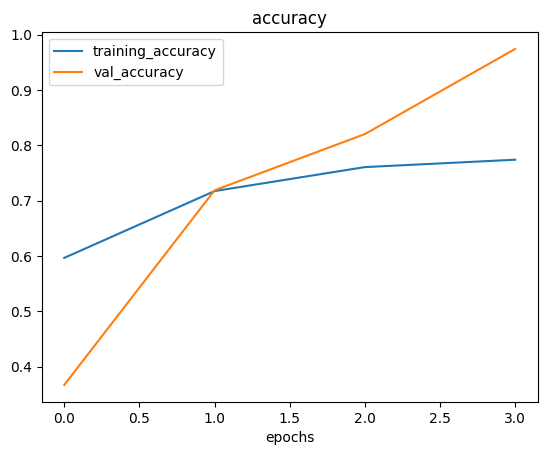

In [60]:
plot_loss_curves(history_7)

In [61]:
import pandas as pd


data = []
for i, result in enumerate([result_1, result_2, result_3, result_4, result_5, result_6, result_7]):

    data.append([f"Model {i+1}", result[0], result[1]])

result = pd.DataFrame(data=data, columns=["Model", "loss", "accuracy"])
result

,Model,loss,accuracy
0,Model 1,0.363896,0.864
1,Model 2,0.693154,0.500
2,Model 3,0.476487,0.754
3,Model 4,0.363896,0.864
4,Model 5,0.333521,0.868
5,Model 6,0.615002,0.700
6,Model 7,0.327124,0.866


In [62]:
print(class_names)

['pizza' 'steak']


In [63]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2025-01-28 03:55:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-01-28 03:55:45 (39.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



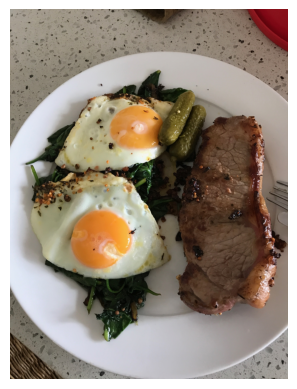

In [64]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [65]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [66]:
steak.shape

(4032, 3024, 3)

In [67]:
def load_and_prep_image(filename,img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size = [img_shape,img_shape])
  img = img/255.
  return img

In [68]:
steak = load_and_prep_image('03-steak.jpeg')

In [69]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


In [70]:
print(class_names)

['pizza' 'steak']


In [71]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [100]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


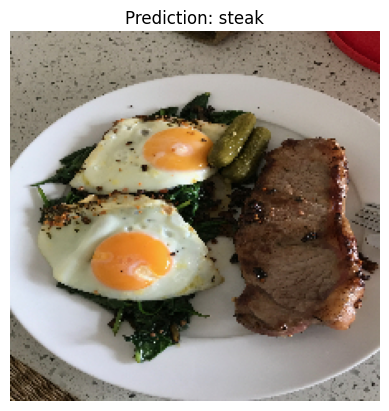

In [73]:
pred_and_plot(model_7,"03-steak.jpeg",class_names)

--2025-01-28 03:55:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-01-28 03:55:48 (56.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


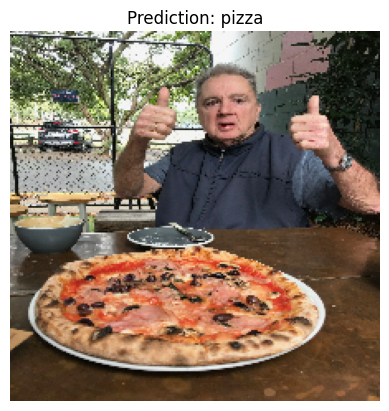

In [74]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

In [75]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-28 03:55:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  74.8MB/s    in 6.3s    

2025-01-28 03:55:55 (78.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [76]:
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 1

In [77]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [78]:
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


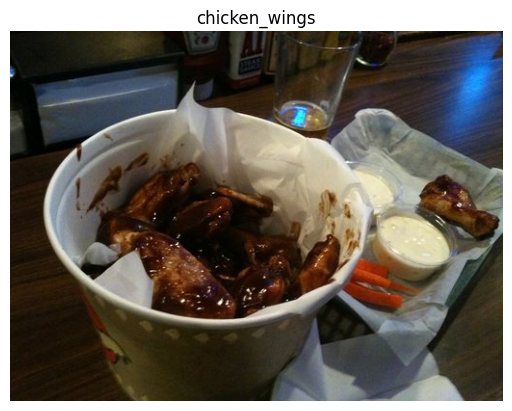

In [79]:
img = view_random_image(target_class=random.choice(class_names),
                        target_dir=train_dir)

Image shape: (512, 512, 3)


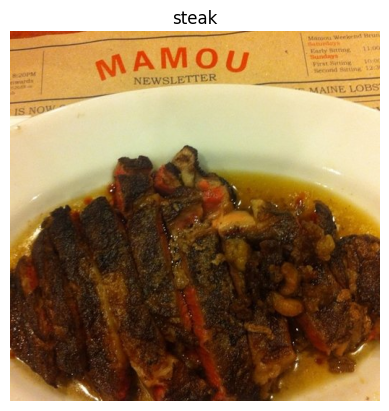

In [80]:
img = view_random_image(target_class=random.choice(class_names),
                        target_dir=train_dir)

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),

                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [83]:
model_8 = Sequential()
model_8.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(Conv2D(10,3,activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Flatten())
model_8.add(Dense(10,activation='softmax'))



model_8.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_8.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = int(0.25*len(train_data)),
                        validation_data = test_data,
                        validation_steps =int(0.25*len(test_data)))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - accuracy: 0.1309 - loss: 2.2940 - val_accuracy: 0.1941 - val_loss: 2.1772
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.2096 - loss: 2.1376 - val_accuracy: 0.2664 - val_loss: 2.0291
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.2494 - loss: 2.0455 - val_accuracy: 0.2615 - val_loss: 2.0130
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3492 - loss: 1.9139 - val_accuracy: 0.3322 - val_loss: 1.8913
Epoch 5/5
 3/58 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3212 - loss: 1.8272

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3228 - loss: 1.8740 - val_accuracy: 0.3235 - val_loss: 1.8800


In [85]:
result_8 = model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.3117 - loss: 1.9273


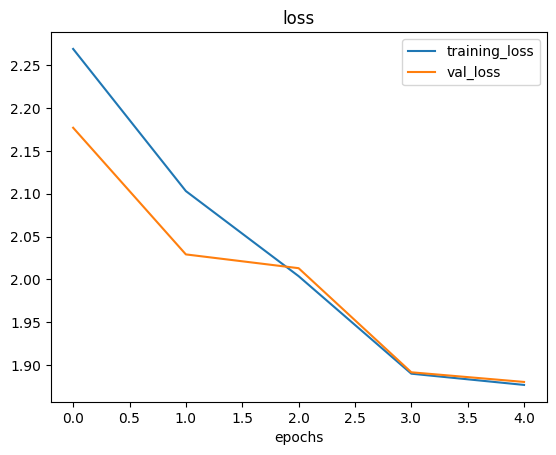

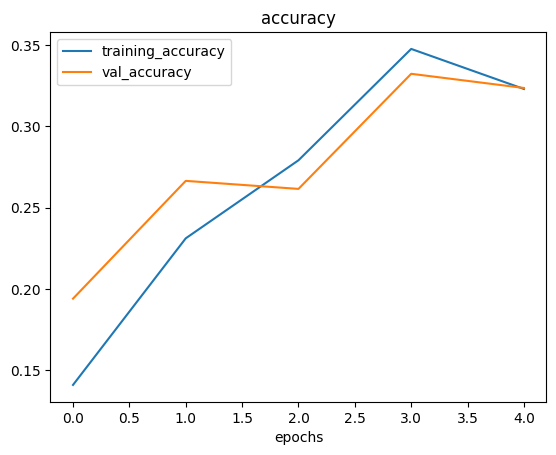

In [86]:
plot_loss_curves(history_8)

In [87]:
model_9 = Sequential()
model_9.add(Conv2D(10,3,activation='relu',input_shape=(224,224,3)))
model_9.add(MaxPool2D())
model_9.add(Conv2D(10,3,activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Flatten())
model_9.add(Dense(10,activation='softmax'))

model_9.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_9.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = int(0.25*len(train_data)),
                        validation_data = test_data,
                        validation_steps =int(0.25*len(test_data)))

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.1194 - loss: 5.3090 - val_accuracy: 0.1842 - val_loss: 2.2367
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.2008 - loss: 2.1909 - val_accuracy: 0.2434 - val_loss: 2.0798
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.2732 - loss: 2.0607 - val_accuracy: 0.2845 - val_loss: 1.9999
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.3213 - loss: 1.9655 - val_accuracy: 0.2632 - val_loss: 2.0230
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2720 - loss: 2.0295 - val_accuracy: 0.2647 - val_loss: 2.1742


In [89]:
result_9 = model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.2664 - loss: 2.0453


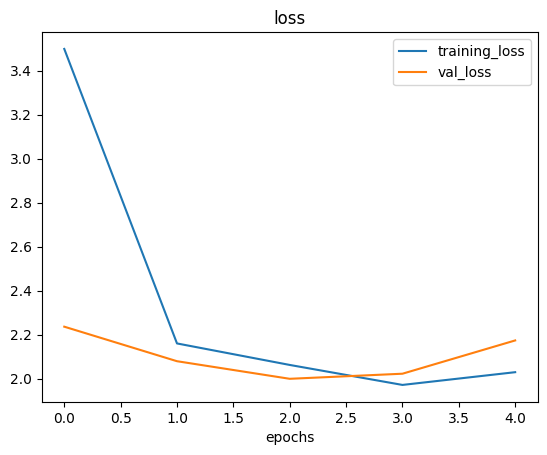

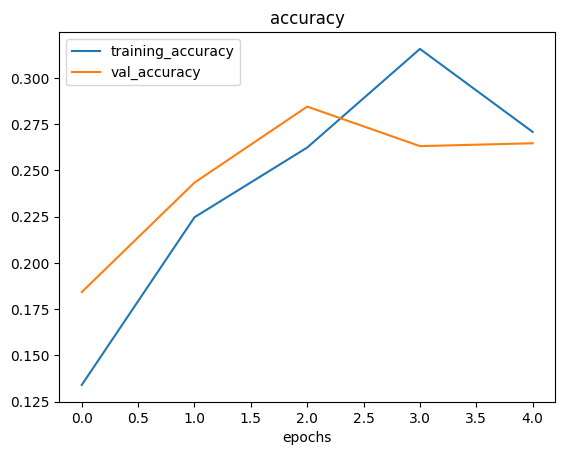

In [90]:
plot_loss_curves(history_9)

In [92]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')



Found 7500 images belonging to 10 classes.


In [130]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_10.summary()

history_10 = model_10.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = int(0.25*len(train_data)),
                        validation_data = test_data,
                        validation_steps =int(0.25*len(test_data)))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.1111 - loss: 2.3454 - val_accuracy: 0.1628 - val_loss: 2.2389
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.1910 - loss: 2.1794 - val_accuracy: 0.2155 - val_loss: 2.1581
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.2255 - loss: 2.0953 - val_accuracy: 0.2253 - val_loss: 2.0921
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.2788 - loss: 1.9992 - val_accuracy: 0.2270 - val_loss: 2.0735
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3554 - loss: 1.9568 - val_accuracy: 0.2794 - val_loss: 2.0425
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.3208 - loss: 1.9356 - val_accuracy: 0.2664 - val_loss: 2.0275
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.3558 - loss: 1.8673 - val_accuracy: 0.3322 - val_loss: 1.9374
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.3705 - loss: 1.8164 - val_accuracy: 0.

In [131]:
result_10 = model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.3044 - loss: 2.0263


In [132]:
print(f"Model 8: {result_8}")

print(f"Model 10: {result_10}")

Model 8: [1.9181742668151855, 0.3255999982357025]
Model 10: [2.0051605701446533, 0.30559998750686646]


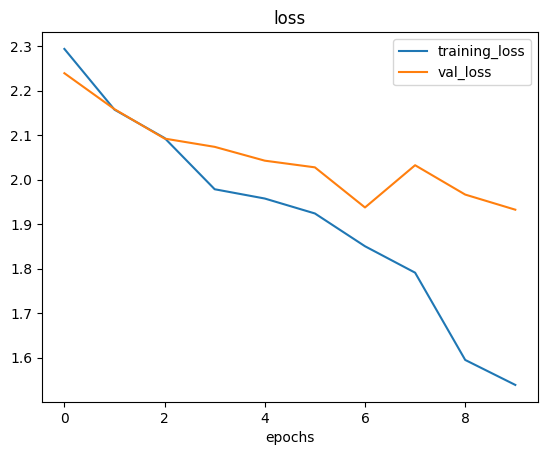

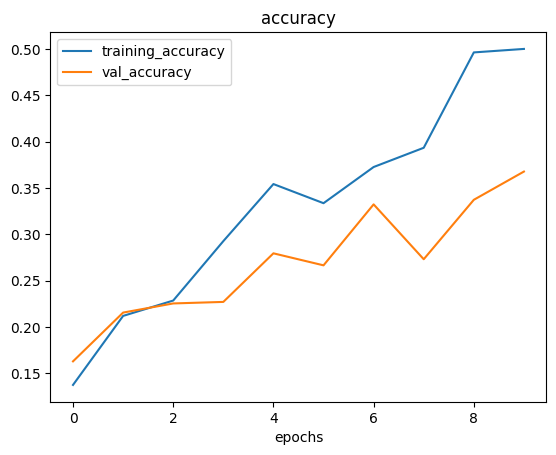

In [133]:
plot_loss_curves(history_10)

In [134]:
!wget https://raw.githubusercontent.com/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/refs/heads/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/3e6ea76dc0dd587fce59f50a091fd927ae3d75fa/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/refs/heads/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/refs/heads/main/images/03-pizza-dad.jpeg

--2025-01-28 05:57:54--  https://raw.githubusercontent.com/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/refs/heads/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.4’

03-hamburger.jpeg.4 100%[===================>]   3.40M  --.-KB/s    in 0.06s   

2025-01-28 05:57:54 (53.2 MB/s) - ‘03-hamburger.jpeg.4’ saved [3564285/3564285]

--2025-01-28 05:57:54--  https://raw.githubusercontent.com/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/3e6ea76dc0dd587fce59f50a091fd927ae3d75fa/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubuserc

In [135]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


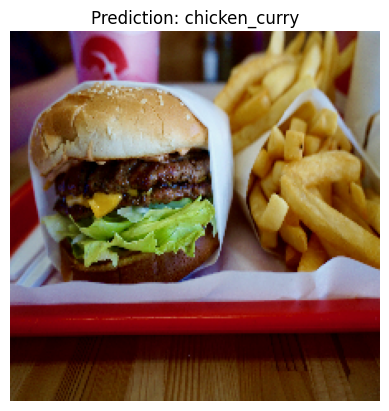

In [136]:
pred_and_plot(model_10,"03-hamburger.jpeg",class_names)